In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf 
from tensorflow.keras.models import load_model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [5]:
data['tey']=1
data.loc[data['TEY'] > 118,'tey'] = 2
data.drop(['TEY'], axis=1,inplace = True)

In [6]:
x =np.array(data.iloc[:,0:10])
y = np.array(data.iloc[:,10])

In [7]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [9]:
def norm_fun(i):
    x = ( i- i.min())/(i.max()-i.min())
    return (x)

In [10]:
x_norm = norm_fun(x)

In [11]:
x_norm

array([[0.00623094, 0.9156068 , 0.08793482, ..., 0.00963355, 0.00286547,
        0.07514684],
       [0.00616335, 0.91606102, 0.08822461, ..., 0.00962719, 0.0029396 ,
        0.0751959 ],
       [0.00626573, 0.91642439, 0.08715357, ..., 0.00962992, 0.00290772,
        0.0749161 ],
       ...,
       [0.00659912, 0.91415331, 0.09038485, ..., 0.00952273, 0.00723366,
        0.08258689],
       [0.00636411, 0.91460753, 0.08994154, ..., 0.00956815, 0.00567679,
        0.0846899 ],
       [0.00629316, 0.9149709 , 0.08860161, ..., 0.00961357, 0.00452509,
        0.08402766]])

In [12]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [13]:
x_train,x_test, y_train, y_test

(array([[1.2551e+01, 1.0143e+03, 1.0013e+02, ..., 1.1839e+01, 1.6860e+00,
         7.1081e+01],
        [1.6510e+01, 1.0268e+03, 6.2651e+01, ..., 1.1979e+01, 2.7768e+00,
         8.1202e+01],
        [2.0720e+01, 9.9978e+02, 6.2787e+01, ..., 1.0009e+01, 4.8150e+00,
         7.1635e+01],
        ...,
        [2.7382e+01, 1.0161e+03, 6.1555e+01, ..., 1.2337e+01, 1.3872e+00,
         6.6656e+01],
        [1.6752e+01, 1.0064e+03, 8.7179e+01, ..., 1.3531e+01, 9.1007e-01,
         6.4670e+01],
        [2.5642e+01, 1.0104e+03, 8.4984e+01, ..., 1.2242e+01, 2.6823e-01,
         6.0775e+01]]),
 array([[3.5892e+00, 1.0182e+03, 8.3867e+01, ..., 1.1893e+01, 7.9996e-01,
         8.4193e+01],
        [2.3293e+01, 1.0119e+03, 7.8369e+01, ..., 1.1582e+01, 2.2127e+00,
         5.9902e+01],
        [1.4427e+01, 1.0166e+03, 8.5573e+01, ..., 1.3294e+01, 2.9631e+00,
         7.4443e+01],
        ...,
        [1.3174e+01, 1.0058e+03, 8.5264e+01, ..., 1.1787e+01, 1.7314e+00,
         7.3966e+01],
        [2.6

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=10,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
1204/1204 [==============================] - 5s 2ms/step - loss: -284175.4375 - accuracy: 0.2085
Epoch 2/50
1204/1204 [==============================] - 3s 2ms/step - loss: -3627674.0000 - accuracy: 0.2085
Epoch 3/50
1204/1204 [==============================] - 2s 2ms/step - loss: -13121808.0000 - accuracy: 0.2085
Epoch 4/50
1204/1204 [==============================] - 3s 2ms/step - loss: -30122198.0000 - accuracy: 0.2085
Epoch 5/50
1204/1204 [==============================] - 3s 2ms/step - loss: -55607916.0000 - accuracy: 0.2085
Epoch 6/50
1204/1204 [==============================] - 3s 2ms/step - loss: -90541072.0000 - accuracy: 0.2085
Epoch 7/50
1204/1204 [==============================] - 2s 2ms/step - loss: -135844928.0000 - accuracy: 0.2085
Epoch 8/50
1204/1204 [==============================] - 3s 2ms/step - loss: -192606272.0000 - accuracy: 0.2085
Epoch 9/50
1204/1204 [==============================] - 3s 2ms/step - loss: -261849408.0000 - accuracy: 0.2085
Epoch 10/5

In [17]:
history 

In [18]:
scores = model.evaluate(x_test , y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 2s 1ms/step - loss: -27029868544.0000 - accuracy: 0.1985
accuracy: 19.85%


In [19]:
scores

[-27029868544.0, 0.19847074151039124]

In [20]:
scores = model.evaluate(x_train , y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: -26691639296.0000 - accuracy: 0.2085
accuracy: 20.85%


In [21]:
scores

[-26691639296.0, 0.20854459702968597]

In [22]:
model.history.history.keys()


dict_keys([])

KeyError: 'val_accuracy'

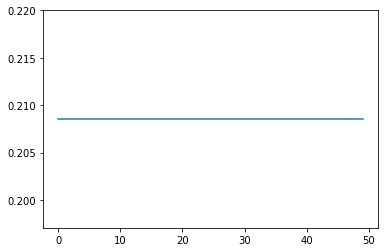

In [24]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()